librairies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json as js
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.rcParams['figure.dpi'] = 150  # ou 200

data

In [ ]:
with open("DATA/outputN100sweep10000.json", "r") as file:
    dic = js.load(file)

print(dic)

with open("DATA/outputN100sweep10000Neel.json", "r") as file:
    dic2 = js.load(file)

print(dic2)

with open("DATA/outputN200sweep10000.json", "r") as file:
    dic3 = js.load(file)

print(dic3)

with open("DATA/outputN150sweep10000.json", "r") as file:
    dic4 = js.load(file)

print(dic4)

with open("DATA/correlationN100sweep10000.json", "r") as file:
    dic5 = js.load(file)

print(dic5)


{'effective sweep list': [1000, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500], 'maximum bond dimension per tebd step': [72, 86, 98, 107, 116, 122, 128, 133, 137, 140, 143, 145, 146, 148, 149, 150, 151, 151, 151], 'energy sweep list': [-0.33918899960146226, -0.39362339503624916, -0.41494403609568503, -0.42458479989789155, -0.42977826210997044, -0.4329842877714136, -0.4351498045006727, -0.43669328889087355, -0.4378271292319544, -0.4386747057905804, -0.4393163232000657, -0.4398082871730382, -0.4401915018702906, -0.4404959574304186, -0.4407435409954988, -0.44095005407035226, -0.44112675066662793, -0.44128152498142775, -0.44141982272272556], 'Trotter-Suzuki time step': 0.001, 'sweep range': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000], 'magnetization sweep list': [-0.002587402410472858, -0.00252820288357882, -0.003150878016167206, -0.0038153082585379292, -0.004456034546263976, 

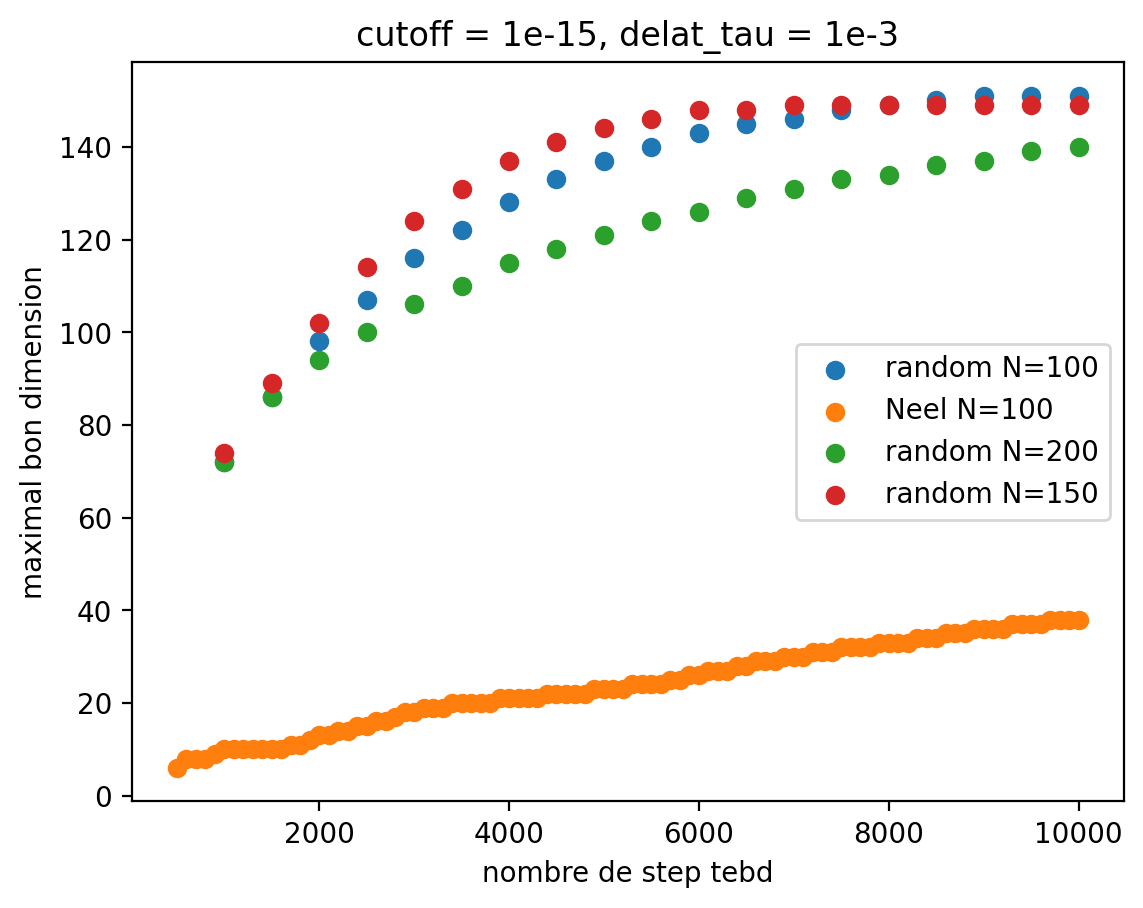

In [45]:
fig, axes = plt.subplots()
axes.scatter(dic["sweep range"], dic["maximum bond dimension per tebd step"], label="random N=100")
axes.scatter(dic2["sweep range"], dic2["maximum bond dimension per tebd step"], label="Neel N=100")
axes.scatter(dic3["sweep range"], dic3["maximum bond dimension per tebd step"], label="random N=200")
axes.scatter(dic4["sweep range"], dic4["maximum bond dimension per tebd step"], label="random N=150")
axes.set_xlabel("nombre de step tebd")
axes.legend()
axes.set_ylabel("maximal bon dimension")
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3")
plt.show()


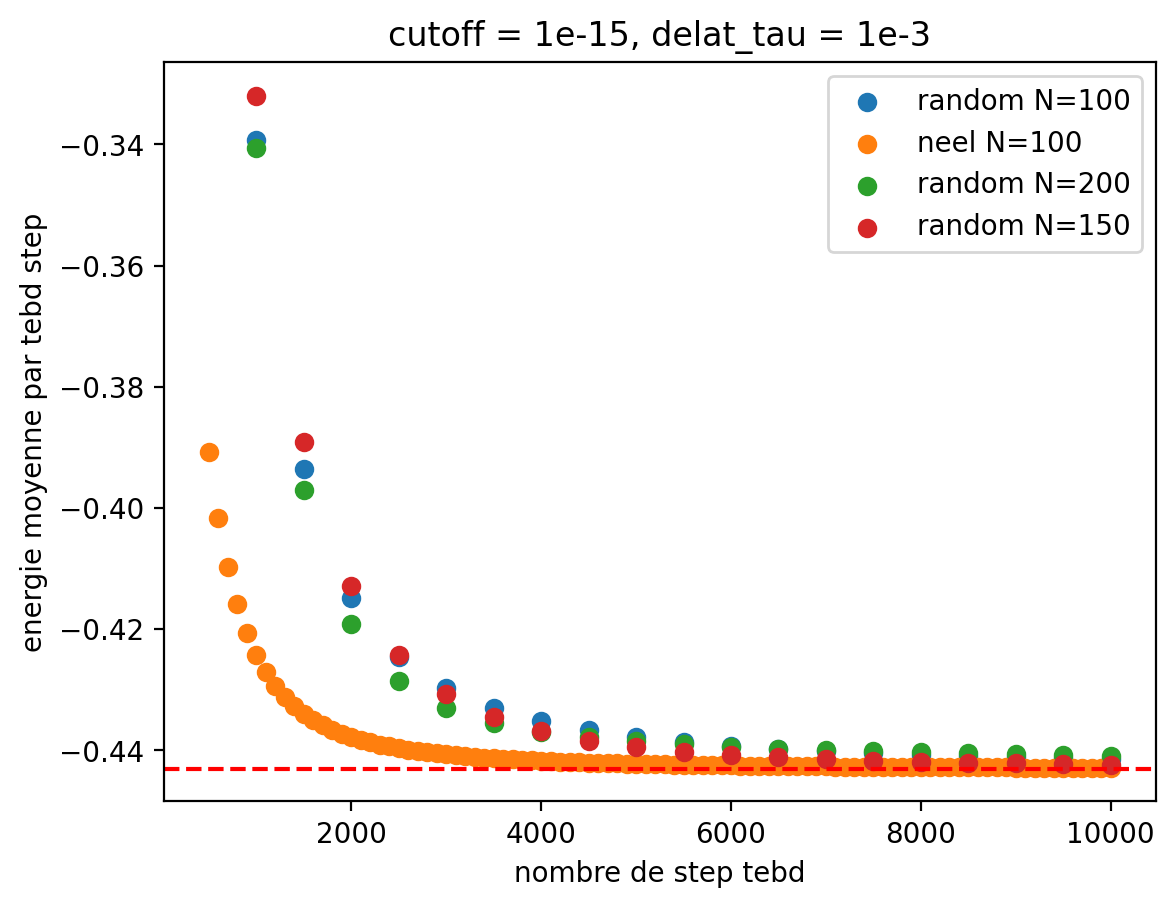

In [46]:
E = 1/4 - np.log(2)

fig, axes = plt.subplots()
axes.scatter(dic["sweep range"], dic["energy sweep list"], label="random N=100")
axes.scatter(dic2["sweep range"], dic2["energy sweep list"], label="neel N=100")
axes.scatter(dic3["sweep range"], dic3["energy sweep list"], label="random N=200")
axes.scatter(dic4["sweep range"], dic4["energy sweep list"], label="random N=150")
axes.set_xlabel("nombre de step tebd")
axes.set_ylabel("energie moyenne par tebd step")
axes.legend()
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3")
axes.axhline(y=E, color='red', linestyle='--')
plt.show()

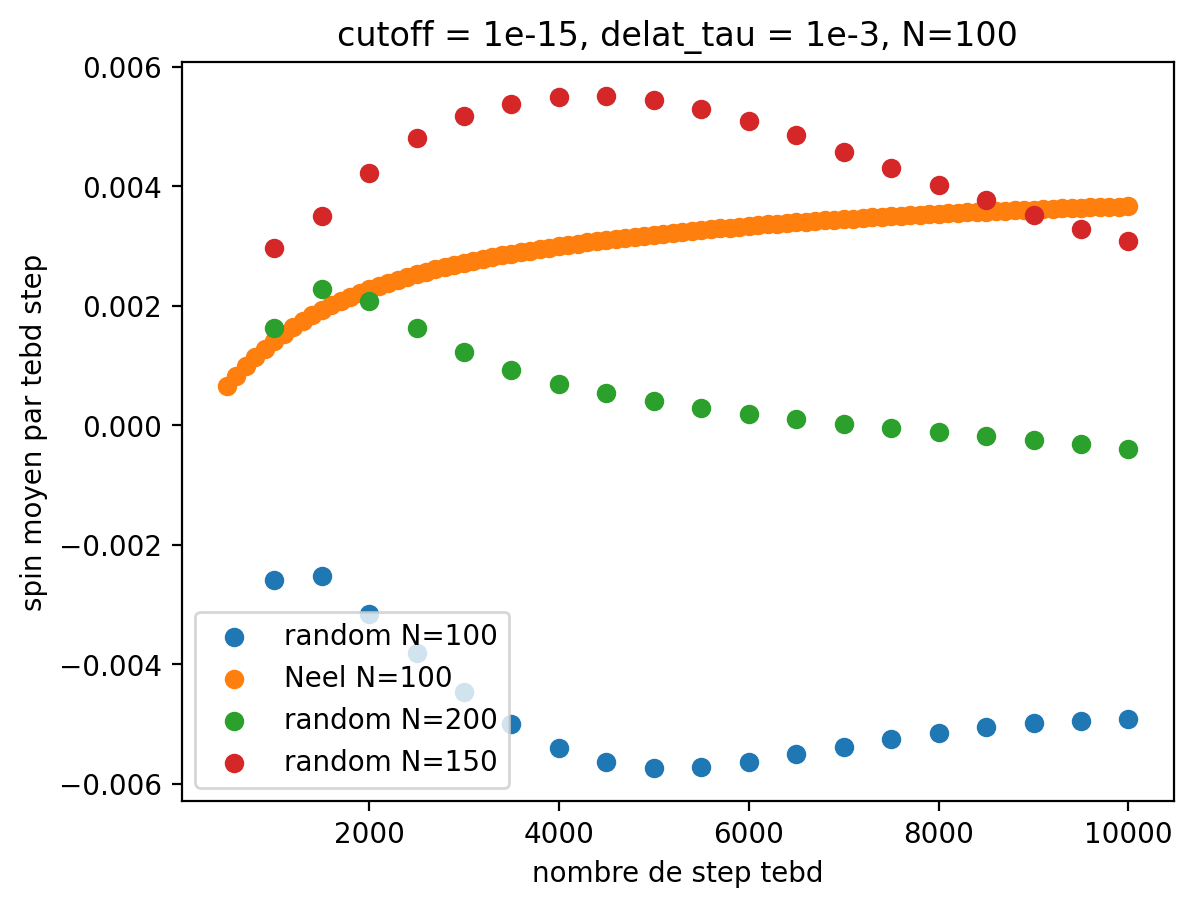

In [47]:
fig, axes = plt.subplots()
axes.scatter(dic["sweep range"], dic["magnetization sweep list"], label='random N=100')
axes.scatter(dic2["sweep range"], dic2["magnetization sweep list"], label ='Neel N=100')
axes.scatter(dic3["sweep range"], dic3["magnetization sweep list"], label="random N=200")
axes.scatter(dic4["sweep range"], dic4["magnetization sweep list"], label="random N=150")
axes.set_xlabel("nombre de step tebd")
axes.set_ylabel("spin moyen par tebd step")
axes.legend()
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3, N=100")
plt.show()

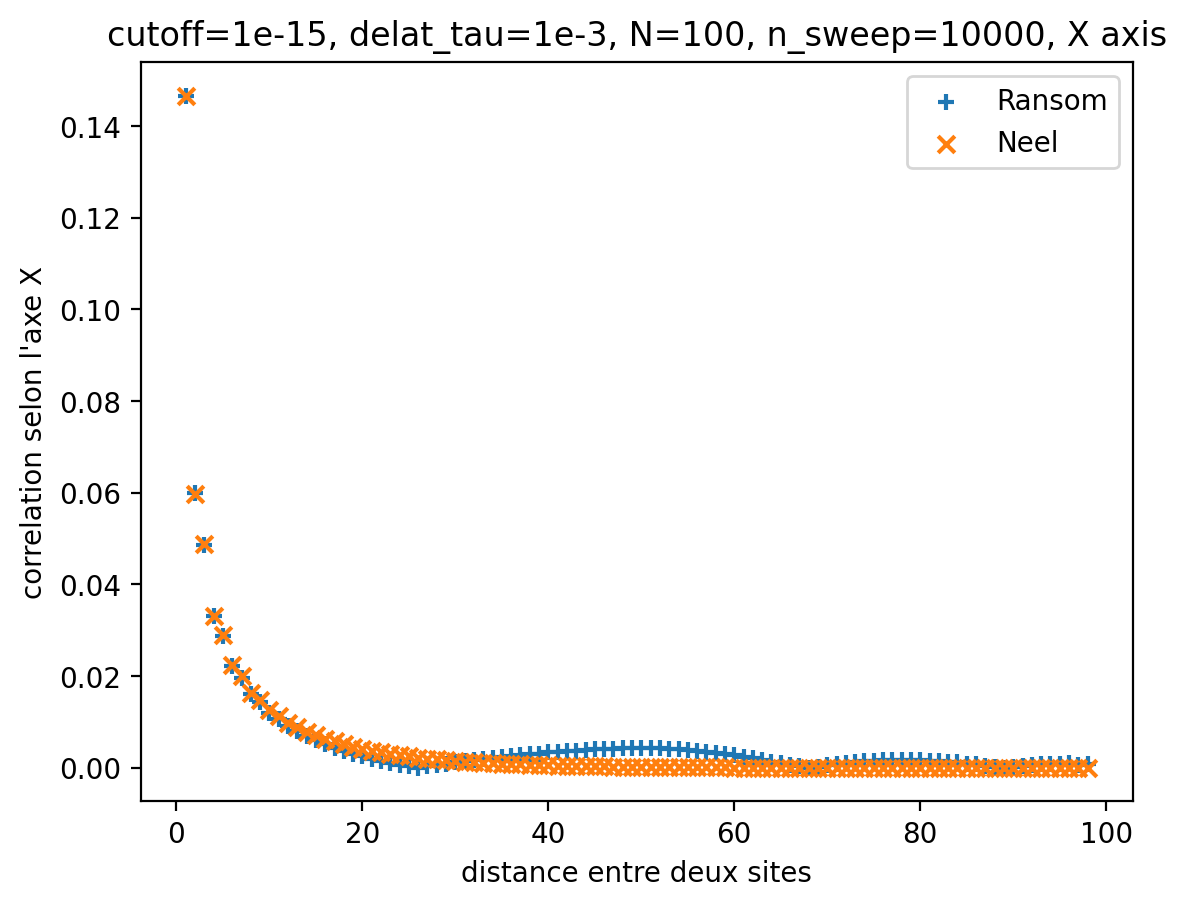

In [48]:
fig, axes = plt.subplots()
axes.scatter(dic5["correlationR x"][0], np.abs(dic5["correlationR x"][1]), label="Ransom", marker='+')
axes.scatter(dic5["correlationN x"][0], np.abs(dic5["correlationN x"][1]), label ='Neel', marker='x')
axes.set_xlabel("distance entre deux sites")
axes.set_ylabel("correlation selon l'axe X")
axes.legend()
axes.set_title("cutoff=1e-15, delat_tau=1e-3, N=100, n_sweep=10000, X axis")
plt.show()

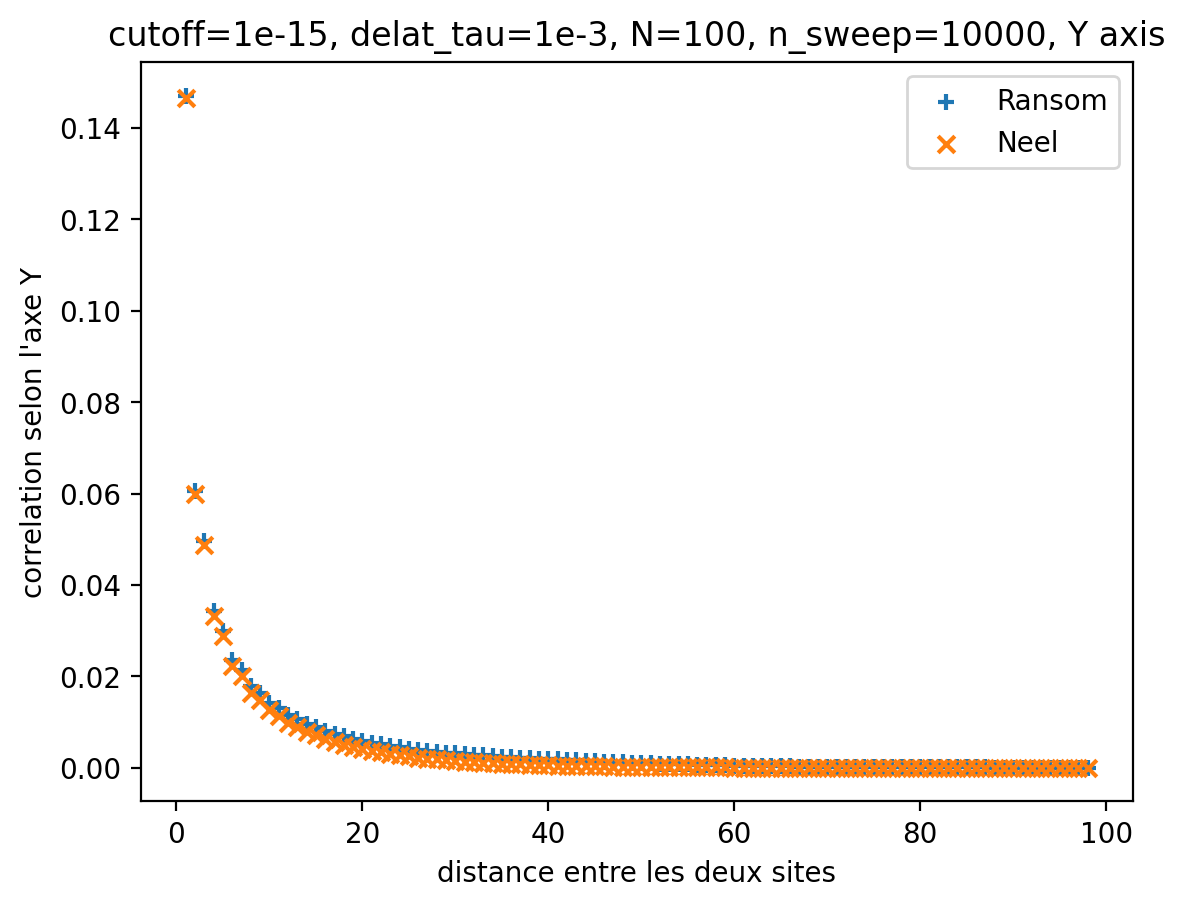

In [49]:
fig, axes = plt.subplots()
axes.scatter(dic5["correlationR y"][0], np.abs(dic5["correlationR y"][1]), label="Ransom", marker='+')
axes.scatter(dic5["correlationN y"][0], np.abs(dic5["correlationN y"][1]), label ='Neel', marker='x')
axes.set_xlabel("distance entre les deux sites")
axes.set_ylabel("correlation selon l'axe Y")
axes.legend()
axes.set_title("cutoff=1e-15, delat_tau=1e-3, N=100, n_sweep=10000, Y axis")
plt.show()

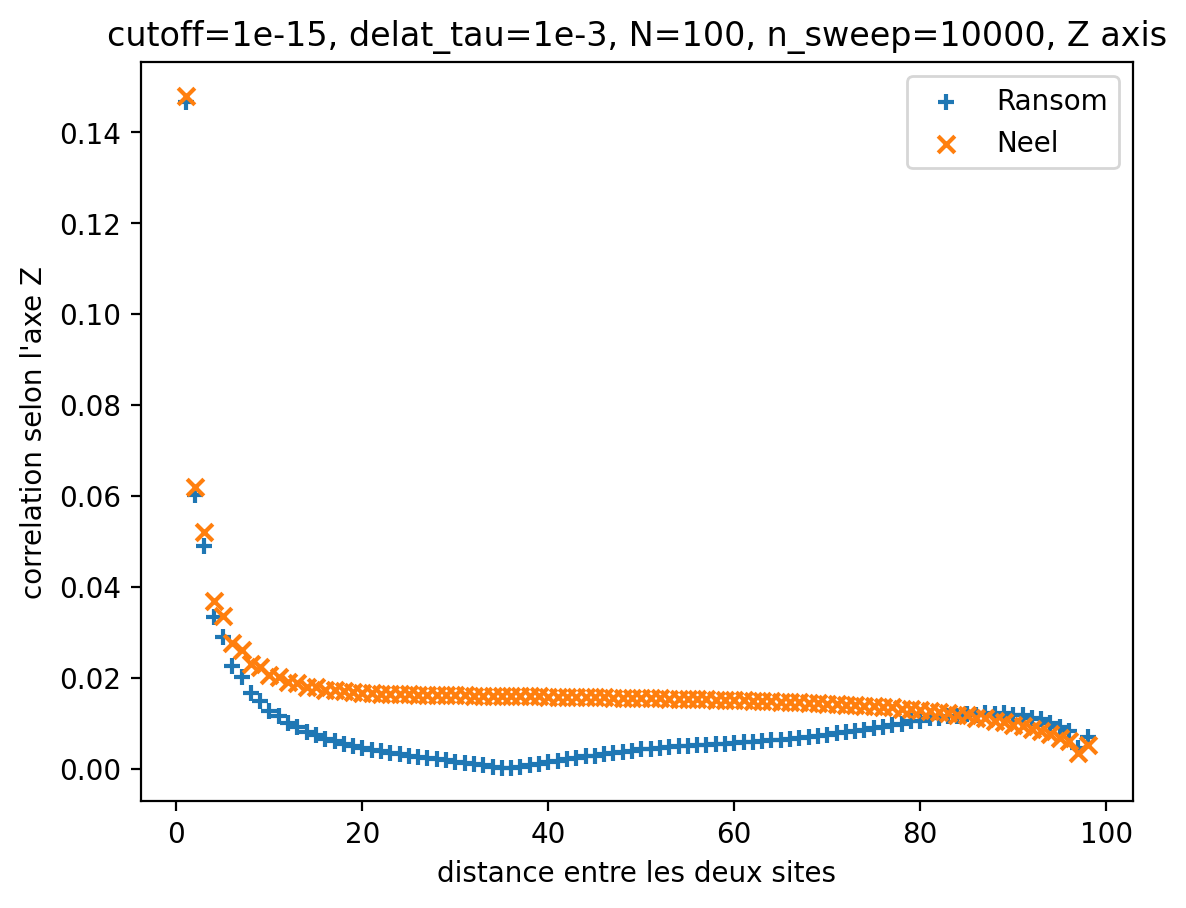

In [50]:
fig, axes = plt.subplots()
axes.scatter(dic5["correlationR z"][0], np.abs(dic5["correlationR z"][1]), label="Ransom", marker='+')
axes.scatter(dic5["correlationN z"][0], np.abs(dic5["correlationN z"][1]), label ='Neel', marker='x')
axes.set_xlabel("distance entre les deux sites")
axes.set_ylabel("correlation selon l'axe Z")
axes.legend()
axes.set_title("cutoff=1e-15, delat_tau=1e-3, N=100, n_sweep=10000, Z axis")
plt.show()

on garde juste l'état de Neel et on trâce tout en semi log sur un même plot pour voir 

/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_14259/2449040225.py:15: RuntimeWarning: divide by zero encountered in divide
  return C1/(x*x) + C2*(-1)**x*np.sqrt(np.log(x))/x
/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_14259/2449040225.py:15: RuntimeWarning: divide by zero encountered in log
  return C1/(x*x) + C2*(-1)**x*np.sqrt(np.log(x))/x
/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_14259/2449040225.py:15: RuntimeWarning: invalid value encountered in sqrt
  return C1/(x*x) + C2*(-1)**x*np.sqrt(np.log(x))/x
/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_14259/2449040225.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(correlationfunction, dic5["correlationN z"][0][:50], dic5["correlationN z"][1][:50], p0=p0)


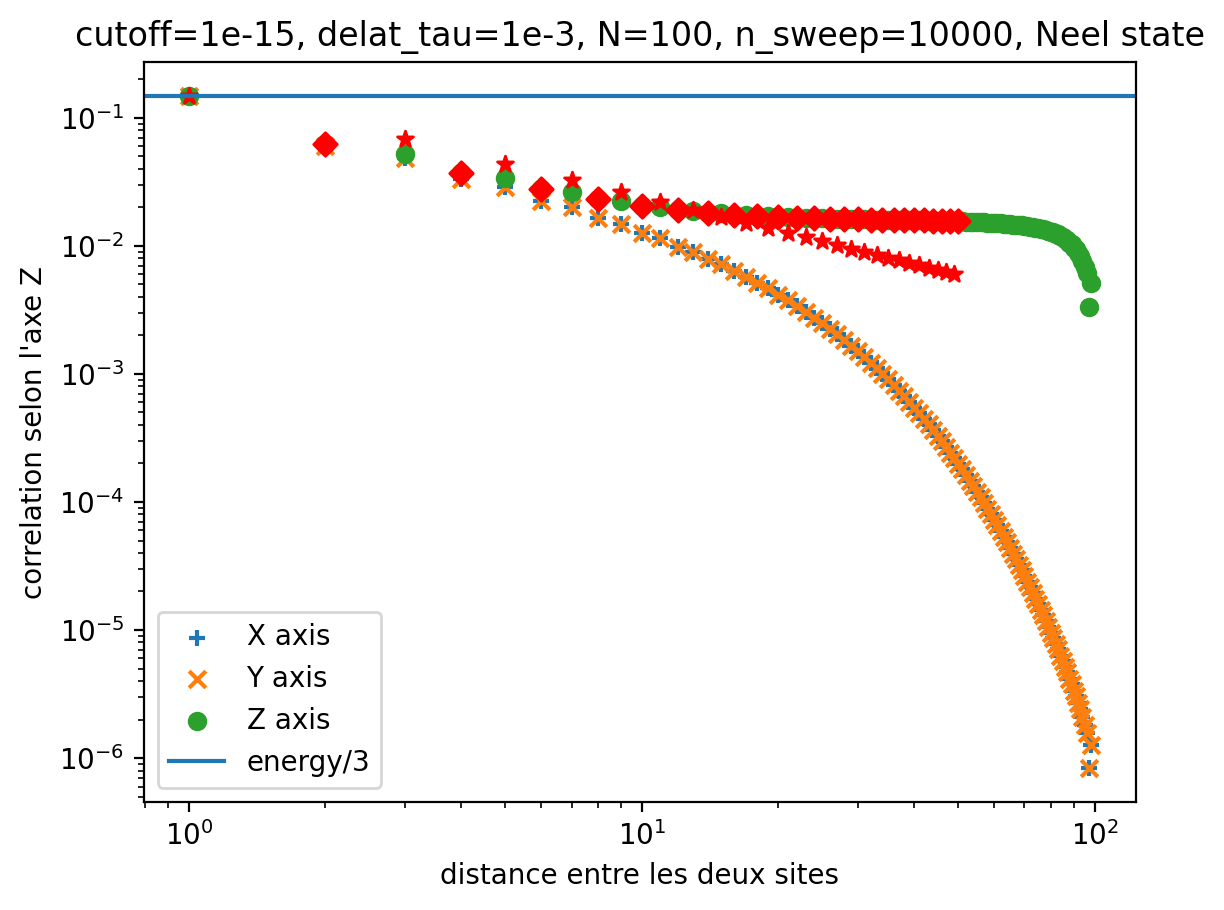

In [65]:
fig, axes = plt.subplots()
axes.scatter(dic5["correlationN x"][0], np.abs(dic5["correlationN x"][1]), label="X axis", marker='+')
axes.scatter(dic5["correlationN y"][0], np.abs(dic5["correlationN y"][1]), label ="Y axis", marker='x')
axes.scatter(dic5["correlationN z"][0], np.abs(dic5["correlationN z"][1]), label ="Z axis", marker='o')
axes.set_xlabel("distance entre les deux sites")
axes.set_ylabel("correlation selon l'axe Z")
axes.set_xscale("log")
axes.set_yscale("log")
axes.axhline(y=-E/3, label="energy/3")
axes.legend()
axes.set_title("cutoff=1e-15, delat_tau=1e-3, N=100, n_sweep=10000, Neel state")

def correlationfunction(C1, C2, x):
    x = np.asarray(x, dtype=int)
    return C1/(x*x) + C2*(-1)**x*np.sqrt(np.log(x))/x
p0 = [-E/3, E/3]
popt, pcov = curve_fit(correlationfunction, dic5["correlationN z"][0][:50], dic5["correlationN z"][1][:50], p0=p0)

axes.scatter(dic5["correlationN z"][0][:50], correlationfunction(*popt, dic5["correlationN z"][0][:50]), color='red', marker='*')
axes.scatter(dic5["correlationN z"][0][:50], dic5["correlationN z"][1][:50], color='red', marker='D')
plt.show()

/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_14259/3197312025.py:28: RuntimeWarning: invalid value encountered in power
  return C1 / (x**2) + C2 * (-1)**x * np.sqrt(np.log(x)) / x
/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_14259/3197312025.py:28: RuntimeWarning: invalid value encountered in log
  return C1 / (x**2) + C2 * (-1)**x * np.sqrt(np.log(x)) / x
/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_14259/3197312025.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(correlationfunction, xdata_fit, ydata_fit, p0=p0)


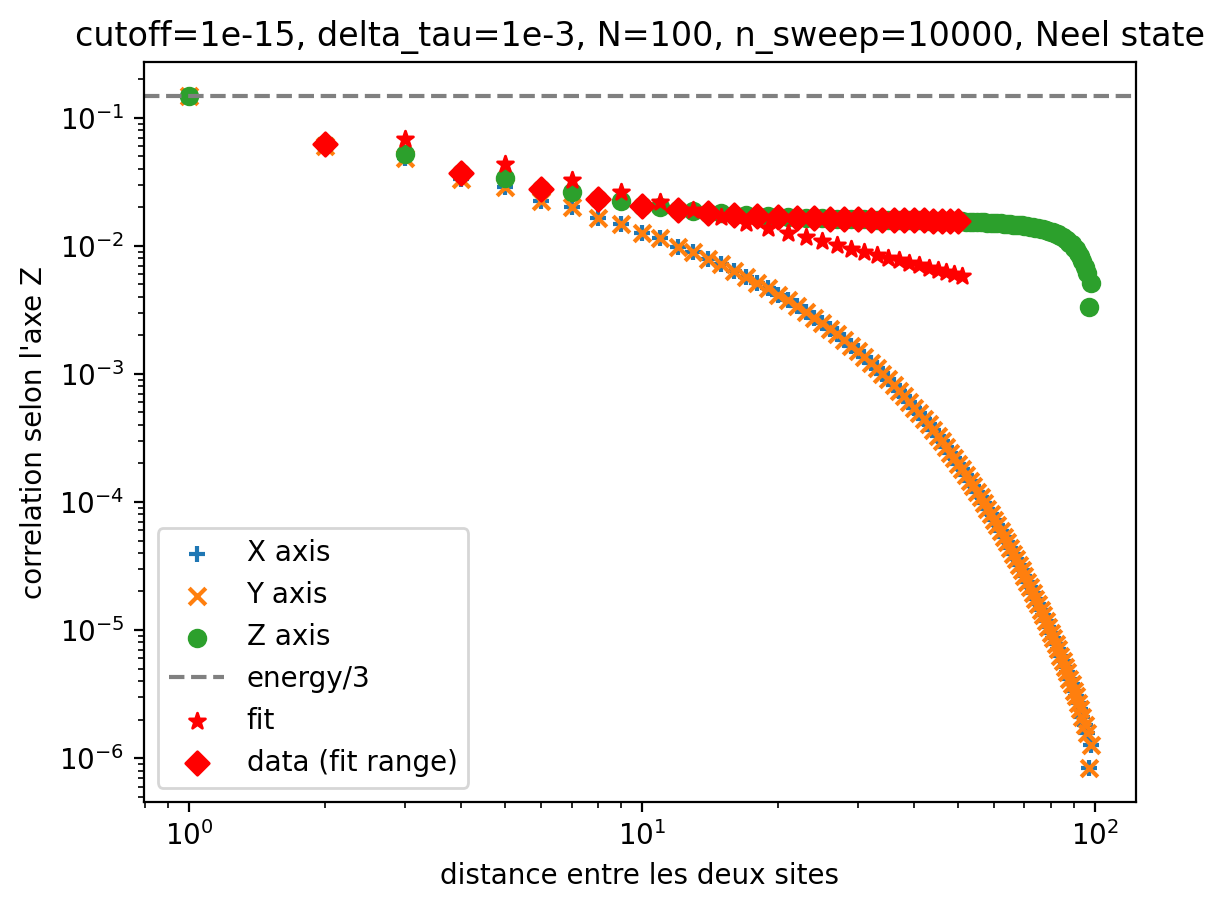

In [71]:
fig, axes = plt.subplots()

# Affichage des corrélations selon X, Y, Z avec valeur absolue
axes.scatter(dic5["correlationN x"][0], np.abs(dic5["correlationN x"][1]), label="X axis", marker='+')
axes.scatter(dic5["correlationN y"][0], np.abs(dic5["correlationN y"][1]), label="Y axis", marker='x')
axes.scatter(dic5["correlationN z"][0], np.abs(dic5["correlationN z"][1]), label="Z axis", marker='o')

axes.set_xlabel("distance entre les deux sites")
axes.set_ylabel("correlation selon l'axe Z")
axes.set_xscale("log")
axes.set_yscale("log")

# Lignes de référence
axes.axhline(y=-E/3, linestyle='--', color='gray', label="energy/3")
axes.set_title("cutoff=1e-15, delta_tau=1e-3, N=100, n_sweep=10000, Neel state")

# Données à fitter
xdata = np.array(dic5["correlationN z"][0])
ydata = np.array(dic5["correlationN z"][1])

# Filtrage pour éviter les x <= 1 et les valeurs non entières
mask = (xdata > 1) & (np.isfinite(xdata)) & (np.isfinite(ydata))&(xdata == xdata.astype(int))
xdata_fit = xdata[mask][:50].astype(int)
ydata_fit = ydata[mask][:50]

def correlationfunction(C1, C2, x):
    x = np.asarray(x, dtype=float)
    return C1 / (x**2) + C2 * (-1)**x * np.sqrt(np.log(x)) / x

p0 = [-E/3, E/3]
try:
    popt, pcov = curve_fit(correlationfunction, xdata_fit, ydata_fit, p0=p0)
    axes.scatter(xdata_fit, correlationfunction(*popt, xdata_fit), color='red', marker='*', label='fit')
    axes.scatter(xdata_fit, ydata_fit, color='red', marker='D', label='data (fit range)')
except Exception as e:
    print("Fit error:", e)

axes.legend()
plt.show()

new data

In [3]:
with open("DATA/outputNeelscalinglongueur.json", "r") as file:
    dicscaling = js.load(file)

print(dicscaling)

with open("DATA/outputNeelscalinglongueurprecis.json", "r") as file:
    dicscalingprecis = js.load(file)

print(dicscalingprecis)

{'maximum bond dimension per tebd step': [18, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26], 'energy sweep list': [-0.470715440768933, -0.4425228757700633, -0.44253319630527294, -0.44253316713456153, -0.44253316724149094, -0.4425331672410204, -0.44253316724105035, -0.44253316724102626, -0.44253316724104774, -0.4425331672410291, -0.4425331672410455, -0.44253316724103076, -0.44253316724104363, -0.44253316724103164, -0.4425331672410433], 'Trotter-Suzuki time step': 0.001, 'magnetization sweep list': [0.027179579636145933, 0.006058934726316664, 0.0031737752880226775, 0.00214997680895456, 0.0016255922214045634, 0.0013068486485802693, 0.0010926111652063, 0.0009387222686984664, 0.0008228306305874853, 0.0007324096821712757, 0.0006598938720553586, 0.0006004439736719899, 0.0005508205047734809, 0.0005087731379968756, 0.0004726899367205139], 'axis spin': 'z', 'Dmax': 300, 'initial bond dimension': 10, 'J': 1, 'cutoff': 1e-15, 'disorder': 0, "type d'initialisation": 'neel', 'N': 100, 'len

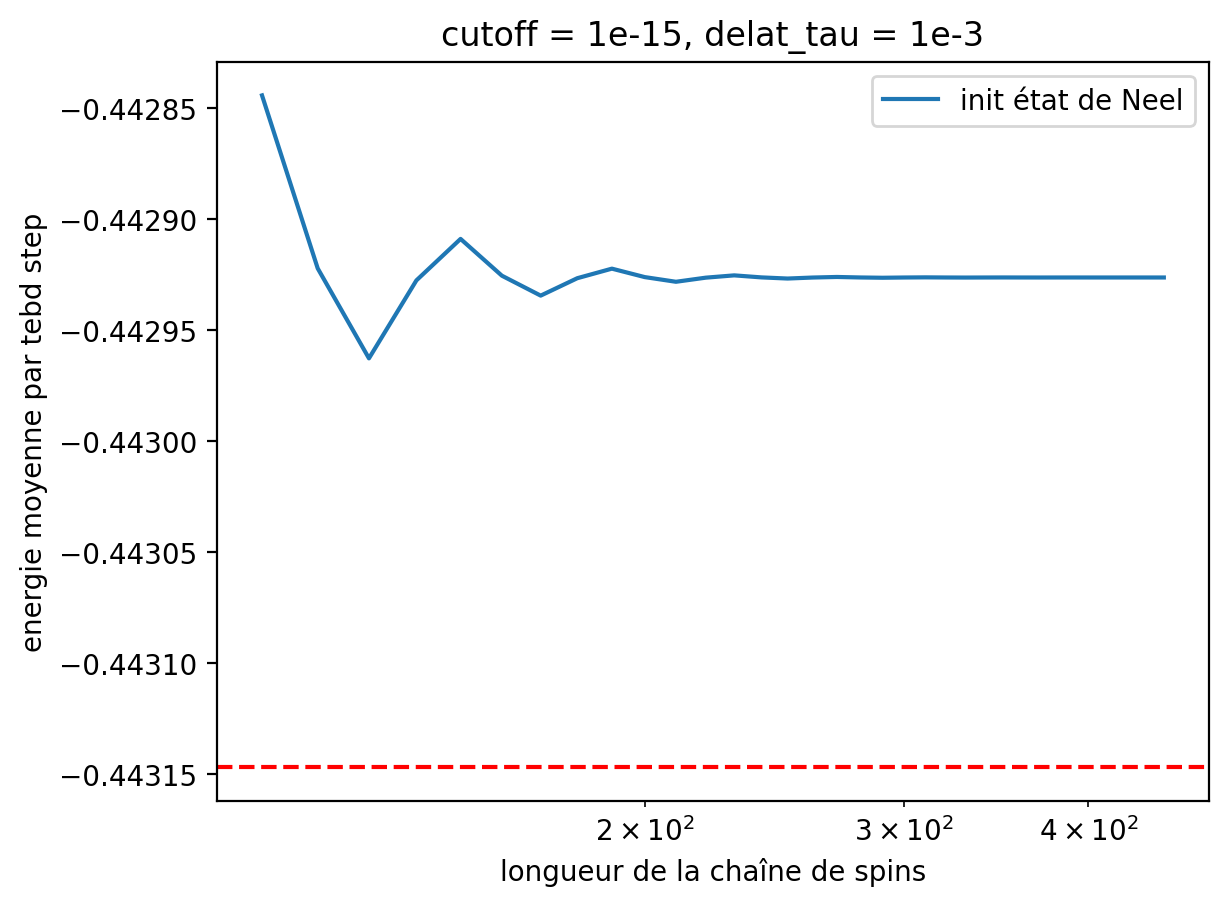

In [12]:
E = 1/4 - np.log(2)
k = len(dicscalingprecis["energy sweep list"])
fig, axes = plt.subplots()
axes.semilogx(dicscalingprecis["length list"][10:k], dicscalingprecis["energy sweep list"][10:k], label="init état de Neel")
axes.set_xlabel("longueur de la chaîne de spins")
axes.set_ylabel("energie moyenne par tebd step")
axes.legend()
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3")
axes.axhline(y=E, color='red', linestyle='--')
plt.show()

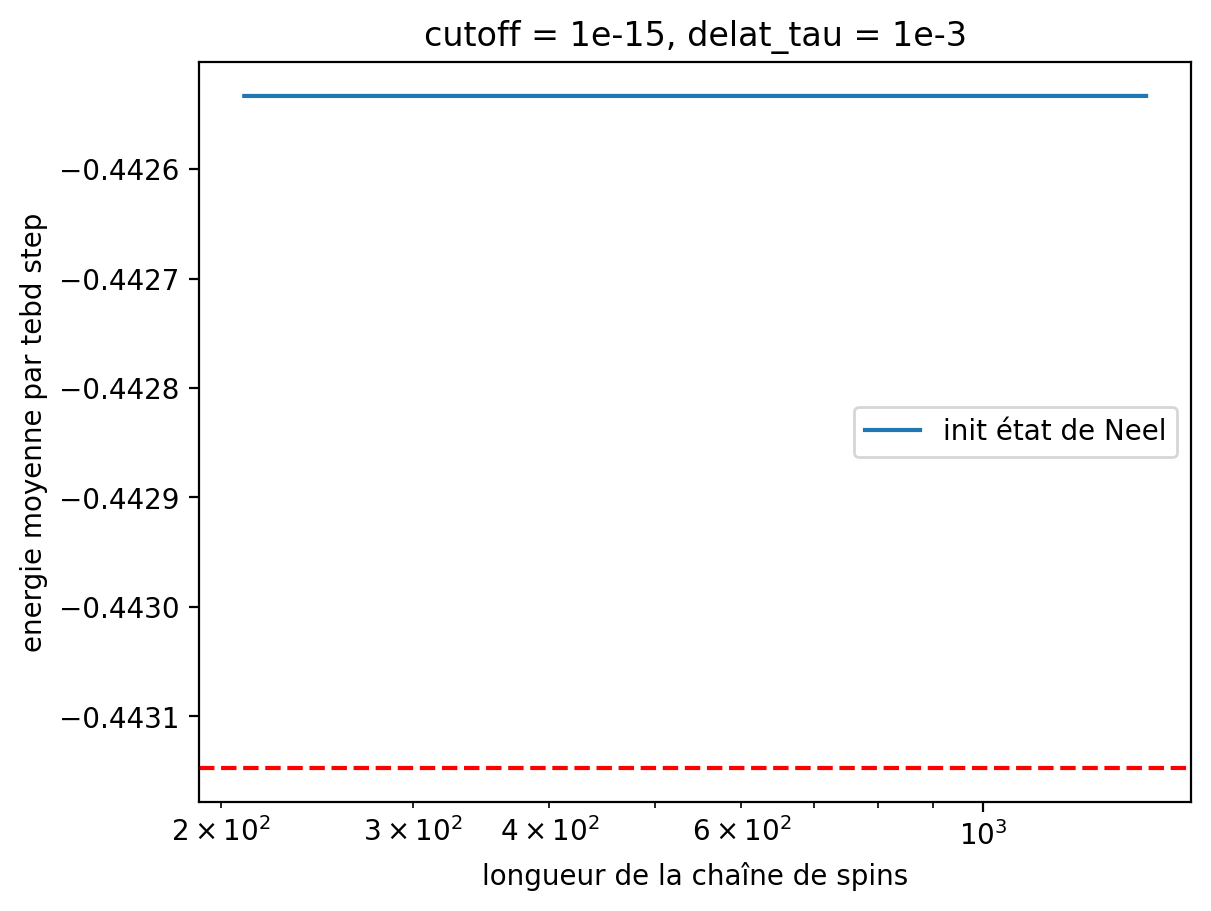

In [13]:
E = 1/4 - np.log(2)
k = len(dicscaling["energy sweep list"])
fig, axes = plt.subplots()
axes.semilogx(dicscaling["length list"][2:k], dicscaling["energy sweep list"][2:k], label="init état de Neel")
axes.set_xlabel("longueur de la chaîne de spins")
axes.set_ylabel("energie moyenne par tebd step")
axes.legend()
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3")
axes.axhline(y=E, color='red', linestyle='--')
plt.show()

In [3]:
with open("DATA/outputN200sweep50000.json", "r") as file:
    dicNeelsweep50000 = js.load(file)

print(dicNeelsweep50000)

{'effective sweep list': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500], 'maximum bond dimension per tebd step': [6, 10, 10, 13, 15, 18, 20, 21, 22, 23, 24, 26, 28, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 62, 63, 64, 65, 65, 66, 67, 67, 68, 69, 70, 71, 71, 72, 73, 74, 74, 75, 76, 77, 78, 78, 79, 80, 81, 81, 82, 83, 83, 84, 85, 86, 86, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 93, 93, 94, 95, 95, 96, 96, 97, 98, 98, 99, 99, 100, 101, 101], 'energy sweep list': [-0.3908

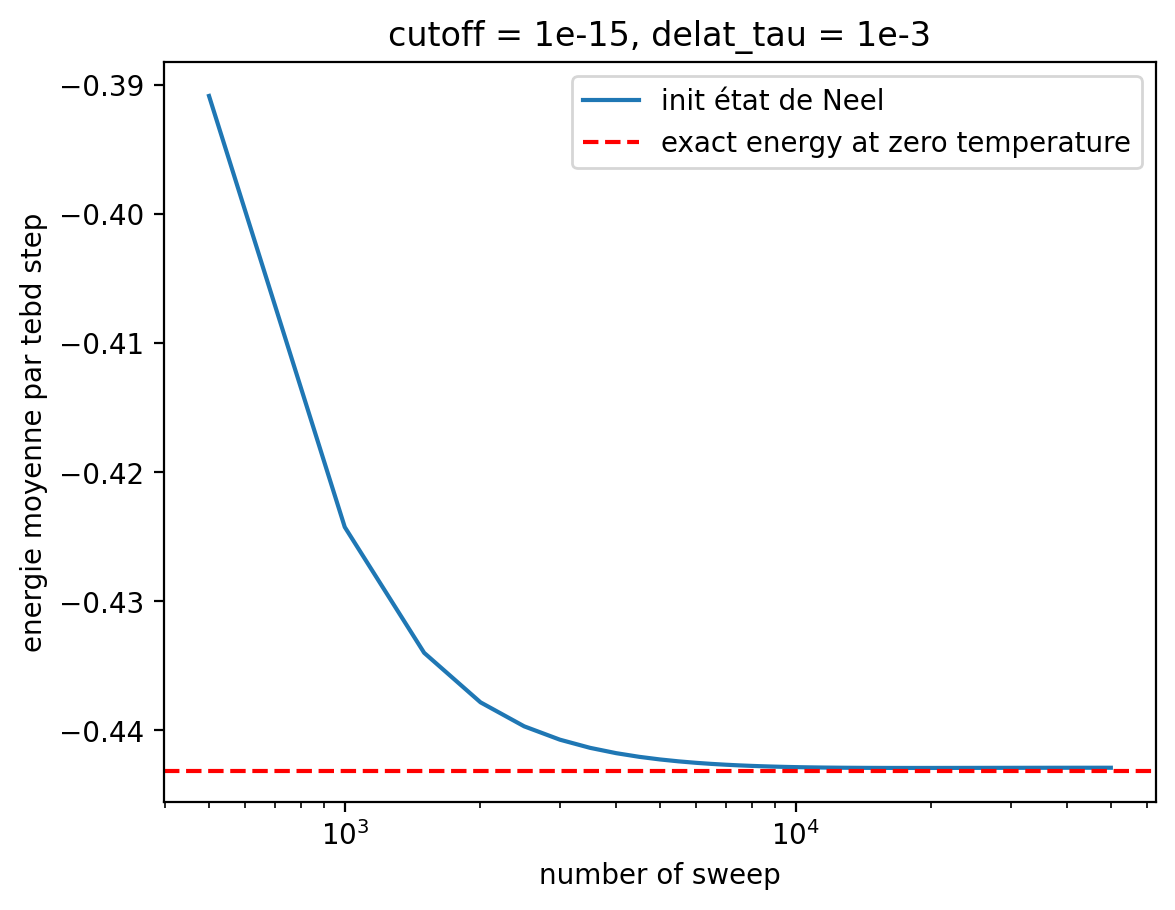

In [14]:
E = 1/4 - np.log(2)
fig, axes = plt.subplots()
axes.semilogx(dicNeelsweep50000["sweep range"], dicNeelsweep50000["energy sweep list"], label="init état de Neel")
axes.set_xlabel("number of sweep")
axes.set_ylabel("energie moyenne par tebd step")
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3")
axes.axhline(y=E, color='red', linestyle='--', label="exact energy at zero temperature")
axes.legend()
plt.show()

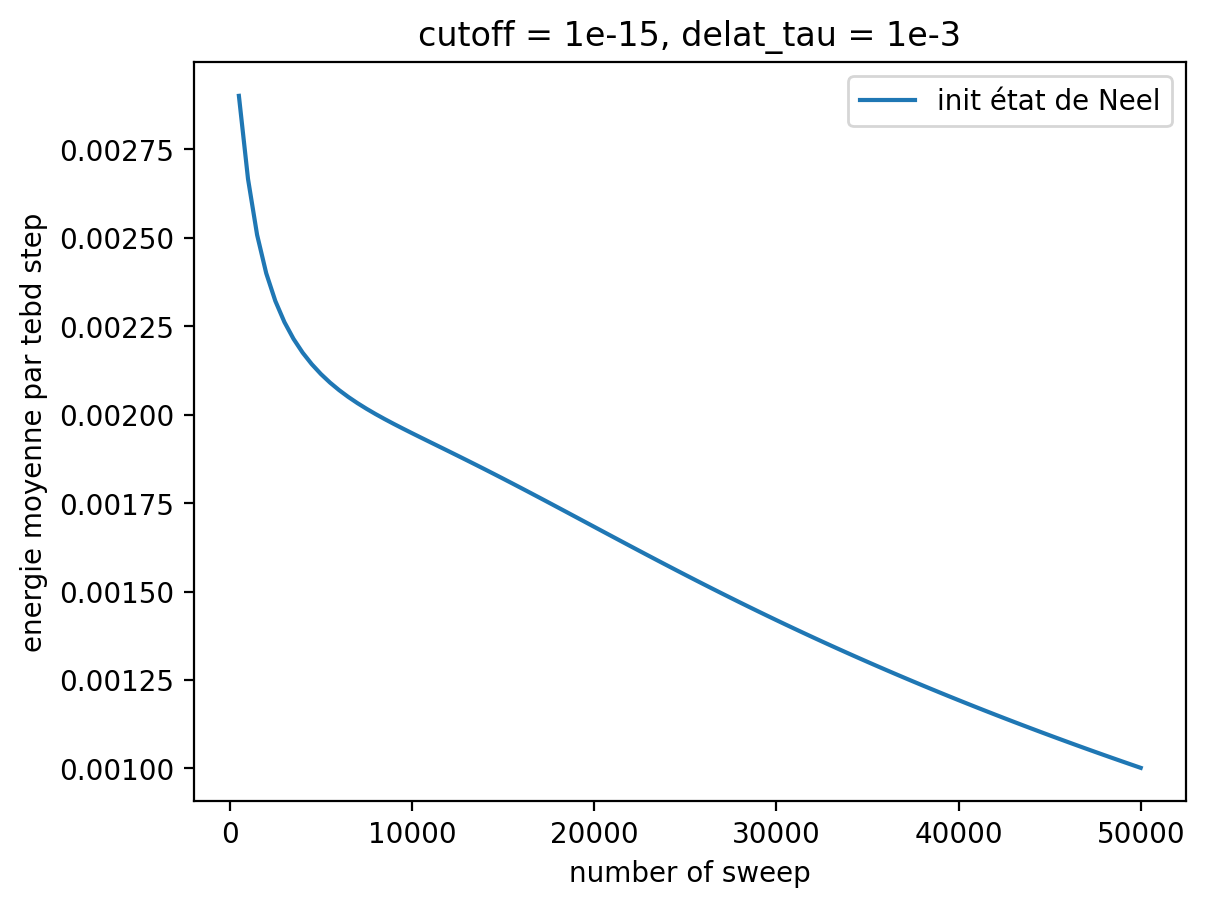

In [ ]:
fig, axes = plt.subplots()
axes.plot(dicNeelsweep50000["sweep range"], dicNeelsweep50000["magnetization sweep list"], label="init état de Neel")
axes.set_xlabel("number of sweep")
axes.set_ylabel("energie moyenne par tebd step")
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3")
axes.legend()
plt.show()

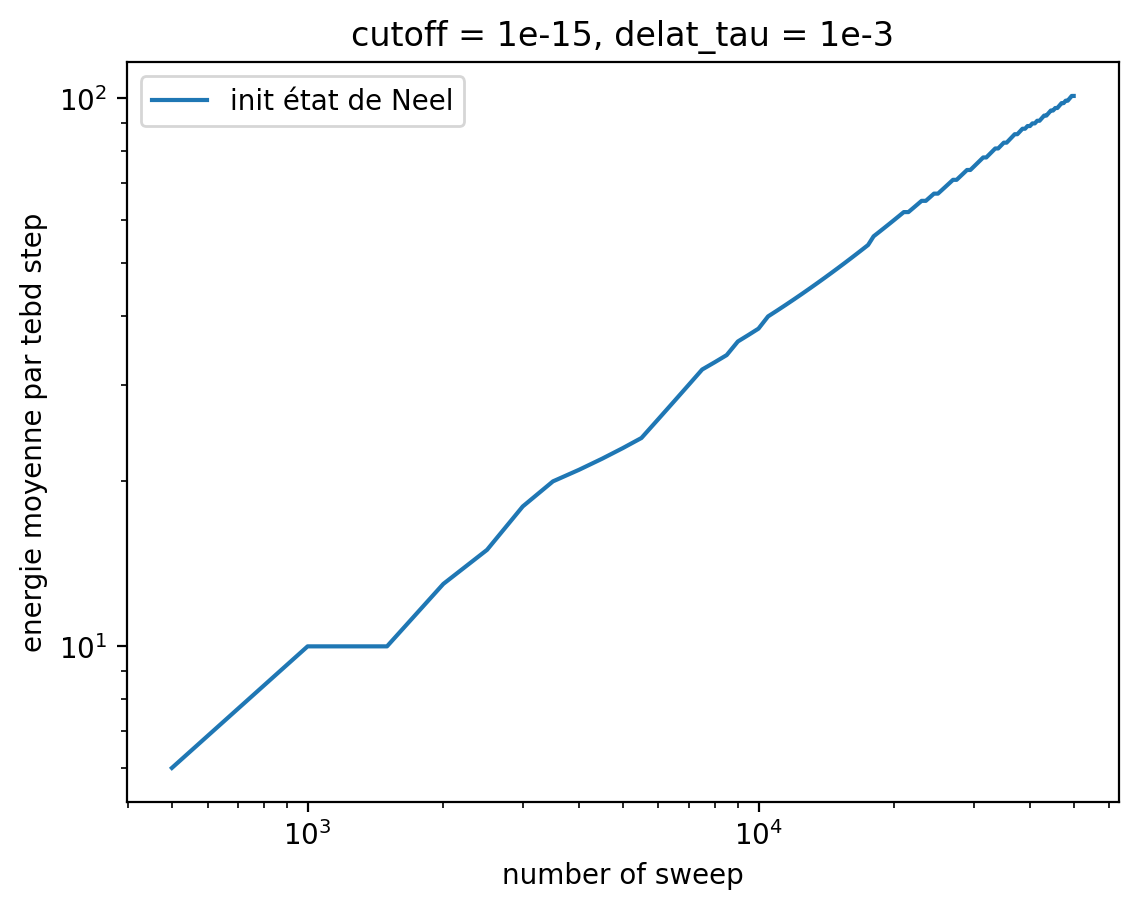

In [16]:
fig, axes = plt.subplots()
axes.loglog(dicNeelsweep50000["sweep range"], dicNeelsweep50000["maximum bond dimension per tebd step"], label="init état de Neel")
axes.set_xlabel("number of sweep")
axes.set_ylabel("energie moyenne par tebd step")
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3")
axes.legend()
plt.show()